# 4. Training Models

## Linear Regression

- The equation for linear regression is given by
$$
    \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n,
$$
where $\hat{y}$ is the predicted value, $n$ is the number of features, $x_i$ is the $i$th feature value, $\theta_j$ is the $j$th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \cdots, \theta_n$).

- This equation can be expressed more concisely using a vector form:
$$
    \hat{y} = h_{\theta}(x)=\theta \cdot x,
$$
where $\theta$ is now the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$; $x$ is now the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1; $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$; $h_0$ is the hypothesis function, using the model parameters $\theta$.

- Remark: if $\theta$ and $x$ are column vectors, then the prediction is $\hat{y}=\theta^T x$, where $\theta^T$ is the *transpose* of $\theta$, and $\theta^T x$ is the matrix multiplication of $\theta^T$ and $x$, and this is often more preferable notation than the dot product.

- A common performance measure of a regression model is the root mean squared error (RMSE); therefore, to train a linear regression model, we find the value of $\theta$ that minimises the RMSE. For the purposes of training however, minimising the mean squared error (MSE) is equivalent, because the value that minimises a function also minimises its square root, and so we can use this as our cost function instead.

- The MSE cost function for a linear regression hypothesis $h_\theta$ on a training set $X$ is
$$
    \operatorname{MSE}(X, h_\theta) = \frac{1}{m}\sum_{i=1}^m (\theta^T x^{i} - y^{i})^2
$$

- The *normal equation* is the closed-form solution to the value of $\theta$ that minimises the cost function. We write
$$
    \hat{\theta} = (X^TX)^{-1}X^Ty,
$$
where $\hat{\theta}$ is the value of $\theta$ that minimises the cost function; $y$ is the vector of target values containing $y^1$ to $y^m$.

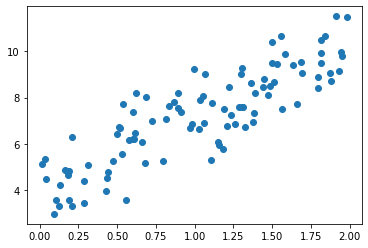

In [6]:
# Generate linear-looking data
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [15]:
# We compute $\hat{\theta}$ using the normal equation

X_b = np.c_[np.ones((100, 1)), X]  # add x0=1 to each instance
X_b

array([[1.        , 0.4432395 ],
       [1.        , 0.60569508],
       [1.        , 0.9815646 ],
       [1.        , 1.38924257],
       [1.        , 1.87785734],
       [1.        , 0.86628439],
       [1.        , 0.16288092],
       [1.        , 0.28687826],
       [1.        , 1.66072008],
       [1.        , 0.12254521],
       [1.        , 0.89037644],
       [1.        , 1.47135819],
       [1.        , 1.79724606],
       [1.        , 0.8153797 ],
       [1.        , 0.60280588],
       [1.        , 0.66077207],
       [1.        , 1.81407311],
       [1.        , 0.42767072],
       [1.        , 1.44825226],
       [1.        , 1.28769886],
       [1.        , 1.51334493],
       [1.        , 1.11007853],
       [1.        , 0.55860514],
       [1.        , 0.31067372],
       [1.        , 1.43899685],
       [1.        , 1.68441412],
       [1.        , 1.48779346],
       [1.        , 0.21069175],
       [1.        , 1.36376194],
       [1.        , 0.79376904],
       [1.

In [14]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.11564315],
       [3.0372197 ]])

We see that the random noise added before means the parameters of the original function, $\theta_0=4, \theta_1=3$, are not recovered. Instead we have
$$
    y = 4 + 3x_1 + \text{(Gaussian noise)}.
$$

In [12]:
# We can make a prediction using $\hat{\theta}$

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0=1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [13]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.11564315],
       [10.19008254]])

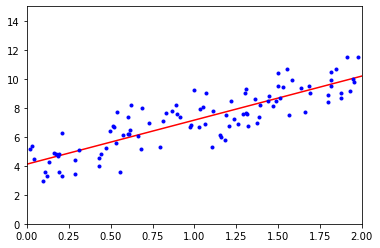

In [18]:
# Plot the model predictions

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()